# Experiments

In this file we will run many experiments and see the impact of tweaking one variable at a time.
All simulations below depend on chance. So when rerun, even when using the exact same simulation configuration, the results might be slightly different.

**Disclaimer**: I am not an epidemiologist in any way, the conclusions that I draw from these simulations might not be accurate in "real life".

In [1]:
from src.config import Config
import src.prob_distribution as dist
from  src.simulation import Simulation
from src.visualization import plot_distribution
from src.triggers.reduction_trigger import ReductionEventTrigger
from src.triggers.testing_trigger import TestingTrigger
from src.visualization import plot_simulation_results
from src.resuts import print_result_summary

# Baseline (If nothing is done)

First, we will run the "if nothing is done" scenario as a baseline to compare how different policies can affect metrics such as:
- Peak number of simultaneous sick people
- Percentage of the population that end up getting the infection
- Peak number of daily new cases
- How long it takes to contain the pandemic

The configuration of the baseline is as follows.
- 3 communities
- 150 people per community
- Incubation time of infection average of 11 days
- Time being sick after showing symptoms on average is 14 days
- Any individual will transmit the infection to someone else on average every 8 days (To a fully susceptible population)
- 80% of the population travel between communities on average once every 40 days and the rest almost never travel
- People go to public places (such as grocery stores) every 4 days on average and spend about half an hour there

**Note:** Because our total population is quite small, the time it takes for the population of healthy suceptible people to decreases significantly is much small than it would be in a real pandemic.
So the time it takes for cases to slow down etc is not a good metric to look at unless it is compared between simulations.
(Ex: Half of the population gets infected much faster than if the total population was much larger.)

If you want to know more about exactly what each configuration argument means it is explained [here](./config_explanation.ipynb)

In [4]:
ticks_per_day = 48
config = Config(ticks_per_day=ticks_per_day,
                number_of_communities=3,
                people_per_community=150,
                transmit_prob_distribution=dist.gaussian_prob_in_days_per_event(mean_days_per_event=8, std_days_per_event=1, ticks_per_day=ticks_per_day),
                travel_prob_distribution=dist.multi_dist(
                                                gaussian_list=[
                                                        dist.gaussian_prob_in_days_per_event(mean_days_per_event=40, std_days_per_event=5, ticks_per_day=ticks_per_day),
                                                        dist.gaussian_prob_in_days_per_event(mean_days_per_event=365, std_days_per_event=40, ticks_per_day=ticks_per_day)
                                                    ],
                                                weights=[0.8, 0.2]
                                        ),
                recovery_time_distribution=dist.gaussian_time_in_days(mean_days=14, std_days=2, ticks_per_day=ticks_per_day),
                incubation_time_distribution=dist.gaussian_time_in_days(mean_days=11, std_days=1.5, ticks_per_day=ticks_per_day),
                public_place_prob_distribution=dist.gaussian_prob_in_days_per_event(mean_days_per_event=4, std_days_per_event=1, ticks_per_day=ticks_per_day),
                public_place_time_distribution=dist.gaussian_time_in_ticks(mean=1, std=0.2)
        )

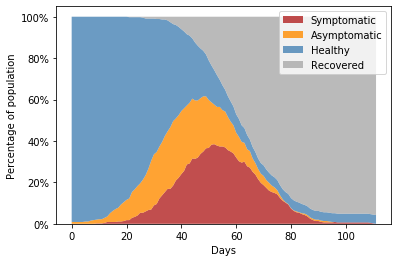

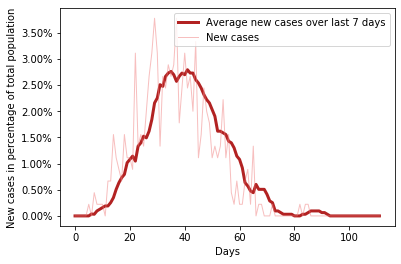

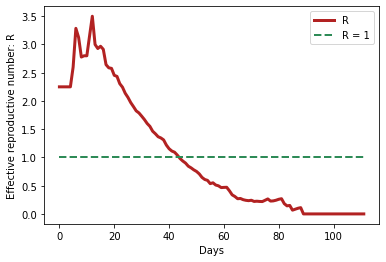

(4.22%) The percentage of people that did not get infected
(95.78%) The percentage of people that did get infected
Day 52: (38.44%) The peak percentage of total sick people (Quarantine included)
Day 48: (61.56%) The peak percentage of total infectious people (Quarantine not included)
Day 41: (2.79%) The peak percentage of total population as average daily new cases


In [7]:
results = Simulation(config).start()
plot_simulation_results(results)
print_result_summary(results)

So this looks pretty bad, at the end of the 110 day simulation, we can see that over 95% of the population got infected at some point in time.
On day 48, over 60% of the entire population was contagious and 4 days later on day 52 there was over a third of the population that were simultaneously sick.

The peak in average number of daily new cases was on day 41 where close to 3% of the total population were getting infected every day.

As for the effective reproductive number [R](https://en.wikipedia.org/wiki/Basic_reproduction_number) we can see that it dips below 1 around day 40 which is when the pandemic finally starts slowing down and the number of daily new cases starts dropping.

# Social Distancing

Social distancing is one of the heavy measures that can be putt in place as it causes many inconveniences for many people. Let's see the effects that it can have.
And how having a few people not respecting the rules can have some marginal effects.

## Social distancing is more effective when everyone takes place in it

#### If everyone did social distancing

As we know, social distancing is not respected by everyone, but what if it was? Let's see a scenario where social distancing is put into place when 10% of the population is simultaneously sick.
In this case everyone will reduce the number of interactions that are having with others on average by a factor of 5.

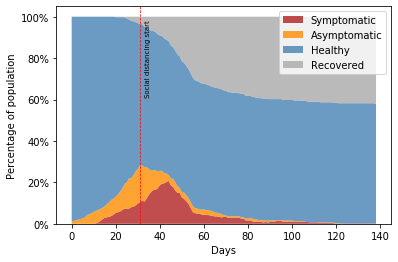

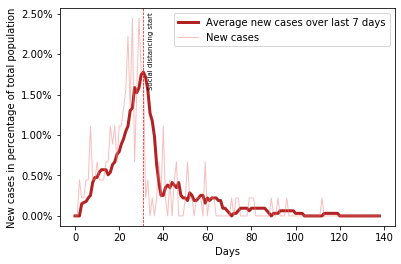

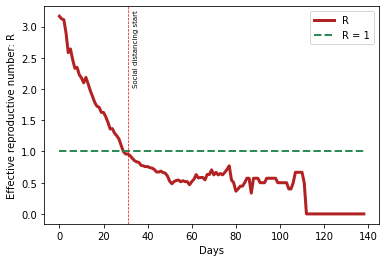

(58.00%) The percentage of people that did not get infected
(42.00%) The percentage of people that did get infected
Day 44: (20.67%) The peak percentage of total sick people (Quarantine included)
Day 32: (28.22%) The peak percentage of total infectious people (Quarantine not included)
Day 31: (1.78%) The peak percentage of total population as average daily new cases


In [16]:
config.social_distancing_trigger = social_distancing_trigger = ReductionEventTrigger(
                                                start_percentages=[0.1],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.gaussian(5, 0.5)
                                        )
results = Simulation(config).start()
plot_simulation_results(results)
print_result_summary(results)

This looks a lot better. Around day 30 when 10% of the population is simultaneously sick, the social distancing rules are put into place.
We can see that the curve has been "flattened" by quite a lot with only a peak of 20% of the population simultaneously sick compared to 60% of the population if nothing was done.
After day 30, the number of average daily cases dropped significantly. This was also able to bring the R value below 1 quicker which was able to better contain the pandemic.

The aftermath is that now only 42% of the population got sick at some point compared to the very high 95% if nothing was done.

#### If only 80% of the population did social distancing.

Now let's look at the exact same scenario as above, but this time, only 80% of the population respects the social distancing rules

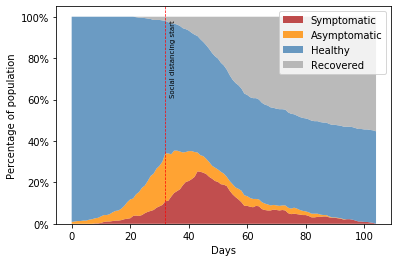

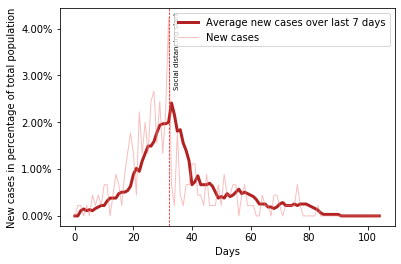

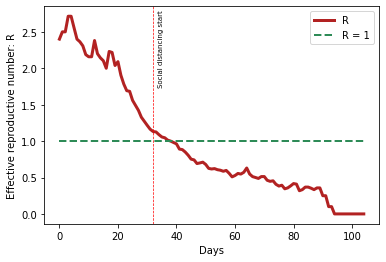

(44.67%) The percentage of people that did not get infected
(55.33%) The percentage of people that did get infected
Day 43: (25.33%) The peak percentage of total sick people (Quarantine included)
Day 35: (35.33%) The peak percentage of total infectious people (Quarantine not included)
Day 33: (2.41%) The peak percentage of total population as average daily new cases


In [4]:
config.social_distancing_trigger = ReductionEventTrigger(
                                                start_percentages=[0.1],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.multi_dist(
                                                    gaussian_list=[
                                                        dist.gaussian(mean=5, std=0.5),
                                                        dist.constant(1)
                                                    ],
                                                    weights=[0.8, 0.2]
                                                )
                                        )
results = Simulation(config).start()
plot_simulation_results(results)
print_result_summary(results)

Things are still looking better than if nothing was done, however, we can see that the results are definitely worse that if everybody respected social distancing.
The social distancing policy was again put in place around day 30, however, this time, even if the number of daily new cases decreases, it doesn't decrease by quite as much.

This eventually leads to 55% of the total population getting infected compared to 40% if everyone respected the social distancing rules.

## Social distancing: the earlier the better

Now let's conciser a scenario where social distancing is enabled earlier when only 5% of the population is sick and everyone respects social distancing rules by decreasong their interactions with other by a factor of 5.

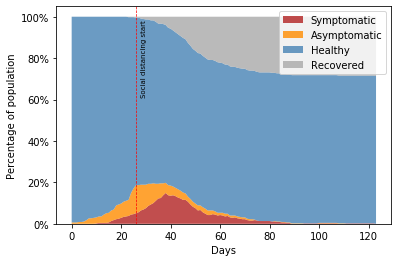

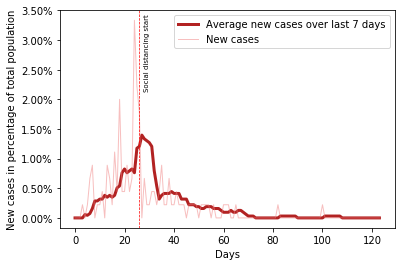

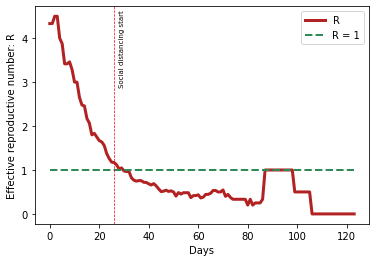

(71.33%) The percentage of people that did not get infected
(28.67%) The percentage of people that did get infected
Day 38: (14.89%) The peak percentage of total sick people (Quarantine included)
Day 38: (19.78%) The peak percentage of total infectious people (Quarantine not included)
Day 27: (1.40%) The peak percentage of total population as average daily new cases


In [6]:
config.social_distancing_trigger = ReductionEventTrigger(
                                                start_percentages=[0.05],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.gaussian(5, 0.5)
                                        )
results = Simulation(config).start()
plot_simulation_results(results)
print_result_summary(results)

This doesn't come as a surprise, but the outcome is looking better. Social distancing was enabled on day 25 only 5 days earlier than when it waited for 10% of the population to be sick. (Which really comes to show how fast exponential processes grow)

By enabling social distancing 5 days earlier, we reduced the percentage of simultaneous sick people from the previous 20% to now 15%.
As for the percentage of the total population that get infected, it decreased by 10% leaving only 70% of the population without ever having contracted the infection.

## The Second Wave

Once the number of cases drop after implementing the social distancing measures, is it safe to remove the policy?

Let's run the same social distancing scenario where the policy is put into place when 10% of the population is infected. However, this time, the policy is removed once there is only 2% of the population left that is sick.

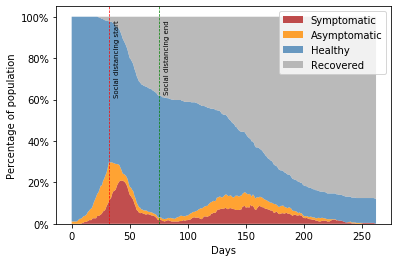

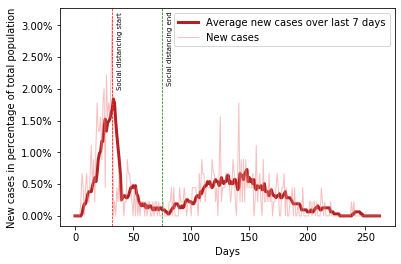

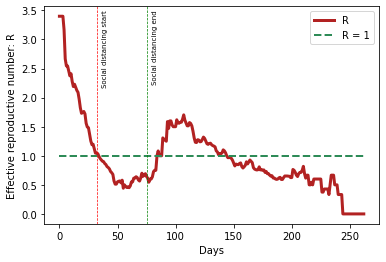

(12.00%) The percentage of people that did not get infected
(88.00%) The percentage of people that did get infected
Day 42: (20.89%) The peak percentage of total sick people (Quarantine included)
Day 32: (29.78%) The peak percentage of total infectious people (Quarantine not included)
Day 33: (1.84%) The peak percentage of total population as average daily new cases


In [11]:
config.social_distancing_trigger = ReductionEventTrigger(
                                                start_percentages=[0.1],
                                                end_percentages=[0.02],
                                                reduction_factor_distribution=dist.gaussian(5, 0.5)
                                        )
results = Simulation(config).start()
plot_simulation_results(results)
print_result_summary(results)

Similar to the basic social distancing scenario, we see that around day 30, the policy is put into place, which slows down the pandemic, the R value dips below 1 as expected.

However, around day 60 when only 2% of the population is sick, when social distancing measures are lifted, we see a spike in the R value and the number of daily cases.
This marks the start of the second wave. Why was this second wave able to start? I speculate that even if there is only a few cases of the infection left, there is still a large percentage of the population that is still susceptible (Healthy) which is why, those few cases still have good chances of interacting with people that are not immune and therefore trnasmitting the infection.

This second wave is not as bad as the first in terms of the number of simultaneous cases, however it lasts much longer. In the end, this scenario leads to almost 90% of the population being infected which is almost as bad as the "Do nothing scenario".
However that isn't the only metric to take into account, the peak number of simultaneous cases (at 1.84%) is still much lower than the "do nothing scenario" which means that there is a much higher chance that the health care system could handle it.

## Social Distancing Takeaways

Social distancing is an effective way to "flatten the curve" and works at its best when everyone is taking part in it.
Small percentages of the population not taking part in it can have some drastic effects leading to a much higher total cases count.
The earlier social distancing is implemented, the better its effects, however, removing the policy too early can lead to a second wave which is a long process for the infection to stick around leading to a high total case count.

# Testing and Quarantining

Testing is arguably the most important policy that should be put into place as fast as possible. Accurate testing allows us to have a better understanding of the situation and also can have urge people that test positive to be put in a full quarantine to ensure that they do not infect anyone else.

Here we will disable social distancing since we want to isolate the effects of testing.
In this scenario, we will start testing people early when about 2% of the population is sick.
Say each individual gets tested on average 2 days after they first start showing symptoms. After testing positive, they go into quarantine which prevents them to infect anyone else.

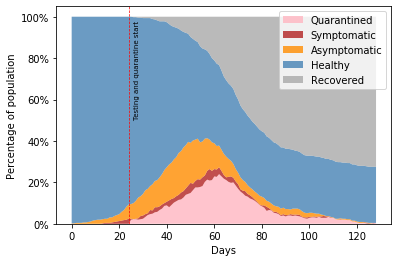

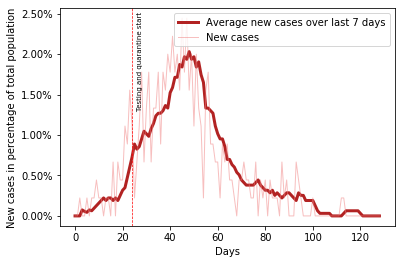

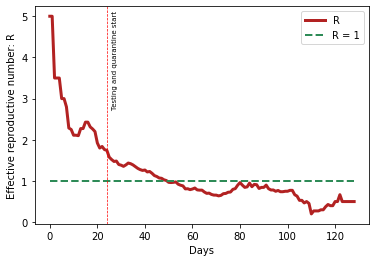

(27.11%) The percentage of people that did not get infected
(72.89%) The percentage of people that did get infected
Day 62: (27.33%) The peak percentage of total sick people (Quarantine included)
Day 49: (25.11%) The peak percentage of total infectious people (Quarantine not included)
Day 48: (2.03%) The peak percentage of total population as average daily new cases


In [3]:
config.social_distancing_trigger = None
config.testing_trigger = TestingTrigger(
                                            start_percentages=[0.02],
                                            end_percentages=[],
                                            time_to_test_distribution=dist.gaussian_time_in_days(mean_days=2, std_days=0.3, ticks_per_day=ticks_per_day),
                                            unsuccessful_test_prob_distribution=dist.constant(0)
                                        )
results = Simulation(config).start()
plot_simulation_results(results)
print_result_summary(results)

As expected, testing and quarantining people that test positive is also a good starategy to slow down the pandemic.
However, we can see on the daily average new cases graph that this strategy slows down the growth of daily new cases but does not drastically decrease it like social distancing does.
This is likey because the infection we are currently modelling has an average incubation period of around 11 days which means that is still lots of time for people to infect each other.

Even if the curve was not flattened as much as social distancing, we can see that the peak percentage of simultaneous pick people is 27% which is still much better than the case when nothing is done (60%).

## Failing Tests

As we know, tests cannot always be perfect and fail, or some people might not respect quarantine rules even after being tested positive, or some people might never show symptoms.
Let's introduce this concept into our model, we will run the exact same scenario this time by starting testing when 2% of the population shows symptoms, however, this time, 25% of people being tested will not go into quarantine for one of the reasons listed above.

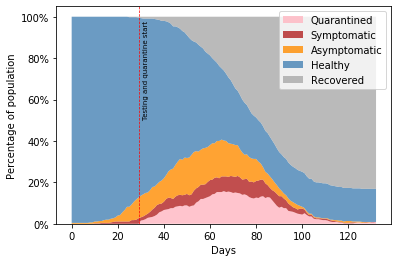

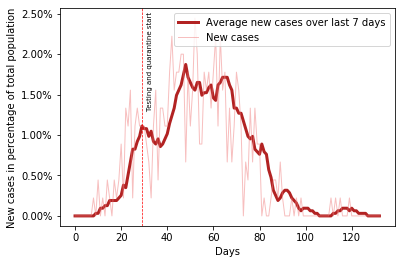

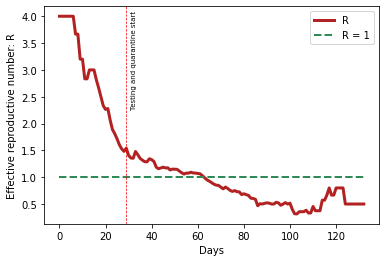

(16.00%) The percentage of people that did not get infected
(84.00%) The percentage of people that did get infected
Day 69: (23.11%) The peak percentage of total sick people (Quarantine included)
Day 53: (25.78%) The peak percentage of total infectious people (Quarantine not included)
Day 48: (1.87%) The peak percentage of total population as average daily new cases


In [3]:
config.testing_trigger = TestingTrigger(
                                            start_percentages=[0.02],
                                            end_percentages=[],
                                            time_to_test_distribution=dist.gaussian_time_in_days(mean_days=2, std_days=0.3, ticks_per_day=ticks_per_day),
                                            unsuccessful_test_prob_distribution=dist.constant(0.25)
                                        )
results = Simulation(config).start()
plot_simulation_results(results)
print_result_summary(results)

As we can see, in the first graph, the strip of Symptomatic (red) people is much thicker compared to the previous run. This is because 25% of people that get tested do not go into quarantine.
This still does flatten the curve but it is not as effective as if everyone went into quarantine. This time, 84% of the total population end up getting infected compared to 73% (If everyone went into quarantine).

This shows that it is important that all testing fails as little as possible and that after getting tested positive, people respect their quarantine duties.

## Testing and Quarantining Takeaways

Testing is important to keep an accurate representation of the situation and can slow don the pandemic by quarantining positive cases.
However, to be as effective as possible, the tests must be accurate and people must respect their quarantine duties.

# Travel Restrictions

Our population is split up into 3 different communities. The infection starts in one of these communities. As infected people start travelling to other communities, the infection spreads to the rest of the population.
Travel restrictions can be put in place to reduce the amount of travel between communities.

However, as we know, as soon as one infectious case arrives in an infection free community, the whole community is at risk.

Travel restrictions in our scenarios will on average reduce the traffic of people between communities by a factor of 100.

### Travel Restrictions Early

If travel restrictions are put into place early enough before all communities get infected, it can have a positive effect.
Here we will enable travel restrictions as soon a 1% of the total population is sick.

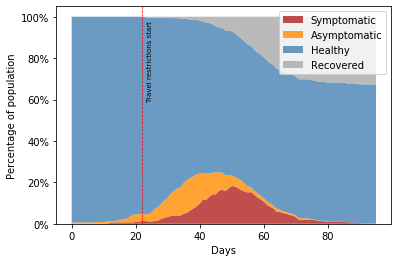

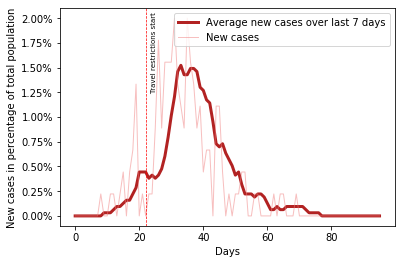

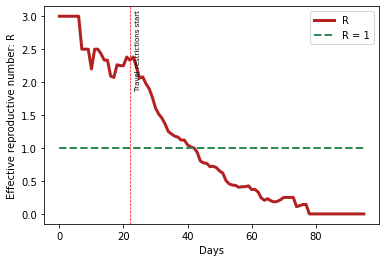

(67.11%) The percentage of people that did not get infected
(32.89%) The percentage of people that did get infected
Day 50: (18.22%) The peak percentage of total sick people (Quarantine included)
Day 45: (24.89%) The peak percentage of total infectious people (Quarantine not included)
Day 33: (1.52%) The peak percentage of total population as average daily new cases


In [4]:
config.testing_trigger = None
config.travel_restrictions_trigger = ReductionEventTrigger(
                                                start_percentages=[0.01],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.gaussian(mean=100, std=2)
                                        )
results = Simulation(config).start()
plot_simulation_results(results)
print_result_summary(results)

When travel restrictions are put into place early enough, an entire community can stay infection free.
We see that here, the travel restrictions were put into place before any infected cases travelled to another community.
In the infected community, since no policies are put into place to slow the growth locally, almost everyone gets infected.
However, the two other communities are completely infection free which leads to around two thirds of people that never got in contact with the infection.

### Travel Restrictions Too Late

In this scenario, we will enable travel restrictions when 10% of the population is simultaneously sick.
This should be after the infection has already spread to all communities. 

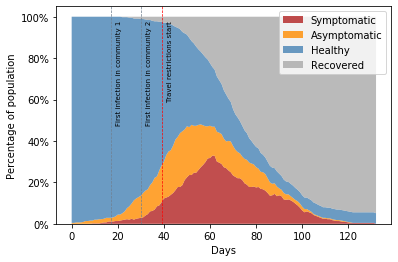

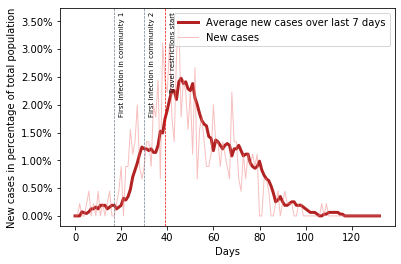

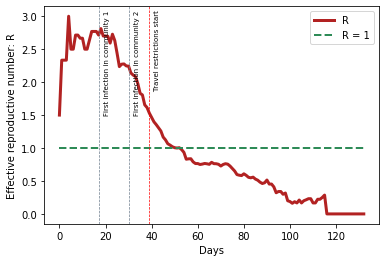

(5.11%) The percentage of people that did not get infected
(94.89%) The percentage of people that did get infected
Day 61: (32.89%) The peak percentage of total sick people (Quarantine included)
Day 56: (48.00%) The peak percentage of total infectious people (Quarantine not included)
Day 46: (2.48%) The peak percentage of total population as average daily new cases


In [4]:
config.travel_restrictions_trigger = ReductionEventTrigger(
                                                start_percentages=[0.1],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.gaussian(mean=100, std=2)
                                        )
results = Simulation(config).start()
plot_simulation_results(results)
print_result_summary(results)

This time, we see that infected individuals enter the infection free communities on day 17 and day 30.
Since the travel restrictions are put into place well after the infectious individuals travelled to the other communities, the outcome is no different from nothing being done at all with 95% of the total population getting infected in a short period of time.

## Travel Restriction Takeaways

Travel restrictions are only effective if they are put into place before all communities are already infected.

# Reduced Travel to Public Places

Public places such as grocery stores can increase the amount of interactions between people since they are in closer proximity and touching the same things.

In this scenario, once 5% of the total population is simultaneously sick, we will reduce the frequency of trips to public places for everyone by a factor of 4.
So instead of going to the store every 4 days, they will go on average every 16 days.

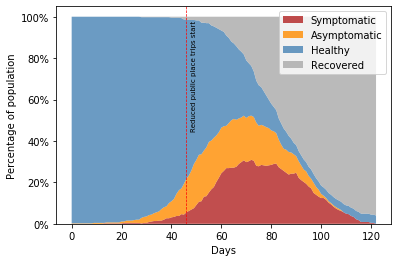

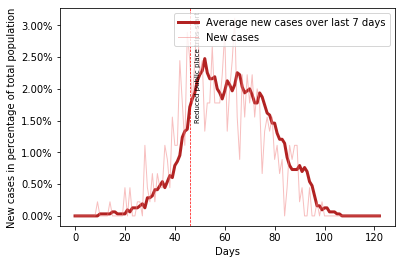

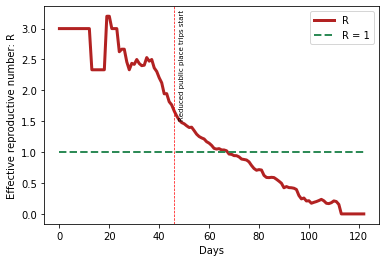

(4.00%) The percentage of people that did not get infected
(96.00%) The percentage of people that did get infected
Day 72: (30.89%) The peak percentage of total sick people (Quarantine included)
Day 72: (52.22%) The peak percentage of total infectious people (Quarantine not included)
Day 52: (2.48%) The peak percentage of total population as average daily new cases


In [5]:
config.travel_restrictions_trigger = None
config.reduced_public_place_trips_trigger=ReductionEventTrigger(
                                                start_percentages=[0.05],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.gaussian(mean=4, std=0.2)
                                        )
results = Simulation(config).start()
plot_simulation_results(results)
print_result_summary(results)

These are some interesting results. From a first glance, this does not seem to have very many differences compared to the "Do nothing" scenario as 95% of the population still ends up getting sick.
However the peak percentage of simultaneous sick people dropped from about 38% to 30% which means this was able to slightly flatten the curve.
However, another interesting observation is that this peak in simultaneous sick cases happens much later on day 72 compared to day 50 when no policies are set in place.

Even if the peak in simultaneous sick cases is almost as large as when nothing is done, the peak happens much later. This extra time can be extremely helpful to be better prepared for the coming cases.

## Reduced Travel to Public Places Takeaway

Reducing trips to public places on its own does not have a great impact on reducing the overall total number of infections.
The peak percentage of simultaneous infections is decreased slightly but more importantly, it is delayed by a significant amount, buying us time to access the situation.

# Combining Everything

What if we put into practice all the takeaways from all the above policies?

- Implement social distancing early with everyone following the rules
- Start testing early with reliable tests and people respecting their quarantine duties when tested positive
- Implement travel restrictions before the infection can spread to the other communities.
- Reduce trips to public places

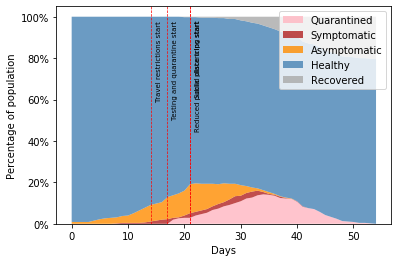

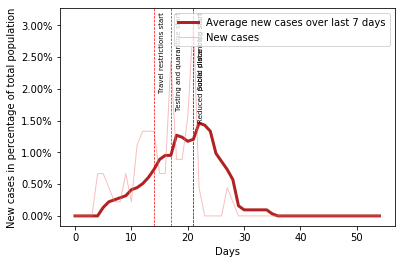

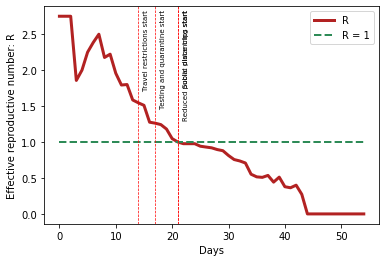

(79.56%) The percentage of people that did not get infected
(20.44%) The percentage of people that did get infected
Day 33: (16.00%) The peak percentage of total sick people (Quarantine included)
Day 21: (16.22%) The peak percentage of total infectious people (Quarantine not included)
Day 22: (1.46%) The peak percentage of total population as average daily new cases


In [8]:
config.social_distancing_trigger = ReductionEventTrigger(
                                                start_percentages=[0.05],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.gaussian(5, 0.5)
                                        )
config.testing_trigger = TestingTrigger(
                                                start_percentages=[0.02],
                                                end_percentages=[],
                                                time_to_test_distribution=dist.gaussian_time_in_days(mean_days=2, std_days=0.3, ticks_per_day=ticks_per_day),
                                                unsuccessful_test_prob_distribution=dist.constant(0)
                                        )
config.travel_restrictions_trigger = ReductionEventTrigger(
                                                start_percentages=[0.01],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.gaussian(mean=100, std=2)
                                        )
config.reduced_public_place_trips_trigger=ReductionEventTrigger(
                                                start_percentages=[0.05],
                                                end_percentages=[],
                                                reduction_factor_distribution=dist.gaussian(mean=4, std=0.2)
                                        )
results = Simulation(config).start()
plot_simulation_results(results)
print_result_summary(results)

When all policies we discussed above are used simultaneously, we have our "best case scenario" where only 20% of the population every gets infected.
The peak in the percentage of simultaneous infections is also at its lowest at 16% of the population.
The R value can be seen to dip below 0 at around 20 days which makes this scenario the fastest to start decreasing the number of active cases.

## Takeaway

Implementing all the policies together does have a great positive effect.

Again, please remember that these are simulations, I am not an epidemiologist in any way.
These are just experiments to see how these indepent variables can affect certain interesting metrics related to this small scale simulated pandemic.
